In [1]:
import pandas as pd

borrow_file_path = r'origin/대출정보 encode.csv'
borrow_df = pd.read_csv(borrow_file_path)

file_path = r'org+preptype+repyr+lastyr.csv'
book_data = pd.read_csv(file_path)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20648\227505148.py:7: DtypeWarning: Columns (7,8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  book_data = pd.read_csv(file_path)


In [2]:
# 대출 일시 열을 datetime 형식으로 변환
borrow_df['대출일시'] = pd.to_datetime(borrow_df['대출일시'])

# 대출 일시 기준으로 데이터 정렬 (내림차순)
data_sorted = borrow_df.sort_values(by='대출일시', ascending=False)

# 대출 일자 확인
most_recent_date = data_sorted.iloc[0]['대출일시']
most_old_date = data_sorted.iloc[-1]['대출일시']

print("가장 오래된 대출일자:", most_old_date)
print("가장 최근 대출일자:", most_recent_date)

가장 오래된 대출일자: 2004-11-01 09:42:00
가장 최근 대출일자: 2024-10-31 21:34:00


In [3]:
all_book_count = book_data.shape[0]
print("전체 도서의 수:", all_book_count)

# '소장위치' 열에서 '보존서고' 값의 개수 세기
count = book_data[book_data['소장위치'] == '보존서고'].shape[0]
print(f"'보존서고' 값의 데이터 개수: {count}")

# '소장위치' 열에서 '보존서고' 값의 개수 세기
count = book_data[book_data['소장위치'] == '4층인문'].shape[0]
print(f"'4층인문' 값의 데이터 개수: {count}")

전체 도서의 수: 301151
'보존서고' 값의 데이터 개수: 138697
'4층인문' 값의 데이터 개수: 162454


In [4]:
from datetime import timedelta

# 5년 전 날짜 계산
five_years_ago = most_recent_date - timedelta(days=5*365)

# 5년 동안 대출된 책 필터링
filtered_data = borrow_df[borrow_df['대출일시'] >= five_years_ago]

# 대출된 책 ID 목록 추출 (중복 제거)
book_ids = filtered_data['도서ID'].unique()

print("5년동안 한 번이라도 대출 된 도서의 ID:")
print(book_ids)

print("5년동안 한 번이라도 대출 된 도서의 수", len(book_ids))

5년동안 한 번이라도 대출 된 도서의 ID:
['SS_105846' 'SS_275317' 'SS_097835' ... 'SS_171677' 'SS_025230'
 'SS_072425']
5년동안 한 번이라도 대출 된 도서의 수 59448


In [5]:
# 전체 id에서 5년간 빌린 책의 id 빼기
unborrowed_books_id = set(book_data['도서ID']) - set(book_ids)
unborrowed_percent = len(unborrowed_books_id) / all_book_count * 100

print("5년동안 한 번도 대출되지 않은 도서의 수", len(unborrowed_books_id))
print(f"전체 도서 중 5년동안 한 번도 대출되지 않은 도서가 {unborrowed_percent}%이다.")

5년동안 한 번도 대출되지 않은 도서의 수 241703
전체 도서 중 5년동안 한 번도 대출되지 않은 도서가 80.25973680977317%이다.


In [6]:
filtered_books = book_data[(book_data['소장위치'] == '보존서고') & (book_data['도서ID'].isin(book_ids))]
print("소장 위치가 보존서고임에도 최근 5년 내 대출되었던 도서의 수 (중복없이!): ", len(filtered_books))

소장 위치가 보존서고임에도 최근 5년 내 대출되었던 도서의 수 (중복없이!):  8036


In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows: 'Malgun Gothic', Mac: 'AppleGothic', Linux: 'NanumGothic')
plt.rc('font', family='Malgun Gothic')  # Windows 환경

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


In [8]:
# 최근 5년 기준 날짜 계산
five_years_ago = most_recent_date - timedelta(days=5*365)

# filtered_books에서 도서 ID 목록 가져오기
filtered_book_ids = set(filtered_books['도서ID'])

# 최근 5년 동안 filtered_books에 있는 도서들의 대출 기록 필터링
recent_borrowed_books = borrow_df[
    (borrow_df['대출일시'] >= five_years_ago) & 
    (borrow_df['도서ID'].isin(filtered_book_ids))
]

# 도서 ID별 대출 횟수 계산
borrow_counts = recent_borrowed_books['도서ID'].value_counts()

# 결과 출력
print(borrow_counts)

SS_126082    24
SS_018222    24
SS_004813    23
SS_144164    23
SS_024060    22
             ..
SS_250291     1
SS_242908     1
SS_016232     1
SS_187307     1
SS_282441     1
Name: 도서ID, Length: 8036, dtype: int64


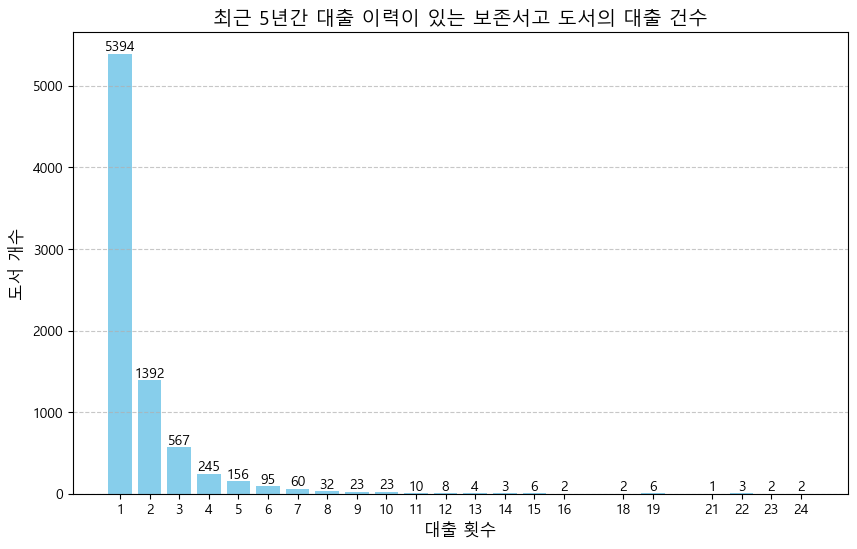

1     5394
2     1392
3      567
4      245
5      156
6       95
7       60
8       32
9       23
10      23
11      10
12       8
13       4
14       3
15       6
16       2
18       2
19       6
21       1
22       3
23       2
24       2
Name: 도서ID, dtype: int64

In [11]:
import matplotlib.pyplot as plt

# 대출 횟수별 도서 개수 계산
borrow_count_distribution = borrow_counts.value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(borrow_count_distribution.index, borrow_count_distribution.values, color='skyblue')

# 그래프 꾸미기
plt.xlabel('대출 횟수', fontsize=12)
plt.ylabel('도서 개수', fontsize=12)
plt.title('최근 5년간 대출 이력이 있는 보존서고 도서의 대출 건수', fontsize=14)
plt.xticks(borrow_count_distribution.index)  # X축 눈금 지정
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 값 표시
for x, y in zip(borrow_count_distribution.index, borrow_count_distribution.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)

# 그래프 저장
plt.savefig("borrow_count_distribution.png", dpi=300, bbox_inches='tight')  # 파일 저장

# 그래프 출력
plt.show()

# 데이터 출력
borrow_count_distribution
